# 💊 Bloque 8 – Visualización de Datos: Resistencia a Antibióticos Multirresistentes 🦠

## 🎯 Objetivo
Explorar el dataset *Multi-Resistance Antibiotic Susceptibility*, que contiene información sobre bacterias, condiciones clínicas y resultados de sensibilidad/resistencia a múltiples antibióticos.  

Este bloque busca que el estudiante:
- Comprenda la estructura y tipos de datos clínicos-biológicos.
- Realice un análisis exploratorio con Pandas.
- Visualice patrones de resistencia bacteriana mediante gráficos apropiados.
- Identifique ejemplos de visualizaciones ineficaces o engañosas.

## 🧰 Librerías utilizadas
- pandas
- seaborn
- matplotlib
- numpy


In [3]:
# 📦 Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os



## 🧬 1. Carga del dataset desde Kaggle

Descargamos el dataset *Multi-Resistance Antibiotic Susceptibility* desde KaggleHub.


In [ ]:
# Cargar el dataset
#df = pd.read_csv("/content/Bacteria_dataset_Multiresictance.csv")

# Mostrar información general
#print("✅ Dimensiones:", df.shape)
#print("📋 Columnas:", df.columns.tolist())
#df.head()


In [4]:
# Descargar dataset desde KaggleHub
path = kagglehub.dataset_download("adilimadeddinehosni/multi-resistance-antibiotic-susceptibility")
print("✅ Dataset descargado correctamente en:", path)

# Buscar archivo CSV
files = [f for f in os.listdir(path) if f.endswith(".csv")]
print("📂 Archivos encontrados:", files)

# Cargar el primer CSV
df = pd.read_csv(os.path.join(path, files[0]))
df.head()


Using Colab cache for faster access to the 'multi-resistance-antibiotic-susceptibility' dataset.
✅ Dataset descargado correctamente en: /kaggle/input/multi-resistance-antibiotic-susceptibility
📂 Archivos encontrados: ['Bacteria_dataset_Multiresictance.csv']


,ID,Name,Email,Address,age/gender,Souches,Diabetes,Hypertension,Hospital_before,Infection_Freq,...,AN,Acide nalidixique,ofx,CIP,C,Co-trimoxazole,Furanes,colistine,Collection_Date,Notes
0,S290,Elizabeth Lawrence,elizabeth.lawrence@example.com,"6350 Robinson Loaf Apt. 447, Paulfurt, RI 30252",37/F,S290 Escherichia coli,No,No,No,0.0,...,S,S,S,S,R,S,S,S,5 Fev 2025,Patient had fever??
1,S291,Tina Sanders,tina.sanders@example.com,"78594 Galloway Port Suite 762, South Tanyatown...",29/F,S291 Morganella morganii,True,No,No,3.0,...,S,S,S,S,S,S,S,S,08/05/2021,تم العلاج
2,S292,Erin Cooke,erin.cooke@example.com,"76661 Isaiah Manors, North Benjamin, HI 85195",77/F,S292 Proteus mirabilis,True,No,No,3.0,...,S,S,S,R,R,S,S,S,01/05/2022,NADA
3,S293,Mrs. Sharon Watson,mrs..sharon.watson@example.com,"1670 Thompson Way Apt. 520, Andrewbury, IL 11534",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-05,PACIENTO ENFERMO
4,S294,Erika Stewart,erika.stewart@example.com,"76838 Patrick Green Suite 538, Torresmouth, ME...",13/F,S294 Escherichia coli,No,Yes,No,1.0,...,R,S,S,S,S,S,S,S,error,NADA


## 🔍 2. Limpieza y estandarización leve de columnas
Convertimos nombres de columnas a minúsculas y simplificamos etiquetas.


In [5]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("/", "_")
df.rename(columns={"age_gender": "Age_Gender"}, inplace=True)

# Eliminar columnas irrelevantes para análisis visual (emails, dirección, etc.)
cols_useless = ["Email", "Address", "Notes", "ID"]
df = df.drop(columns=cols_useless)

print("✅ Columnas seleccionadas para análisis:")
print(df.columns.tolist())


✅ Columnas seleccionadas para análisis:
['Name', 'Age_Gender', 'Souches', 'Diabetes', 'Hypertension', 'Hospital_before', 'Infection_Freq', 'AMX_AMP', 'AMC', 'CZ', 'FOX', 'CTX_CRO', 'IPM', 'GEN', 'AN', 'Acide_nalidixique', 'ofx', 'CIP', 'C', 'Co-trimoxazole', 'Furanes', 'colistine', 'Collection_Date']


## 📊 3. Exploración básica (EDA)

In [6]:
df.info()
print("\n🔍 Valores nulos por columna:")
print(df.isna().sum())

print("\n📈 Ejemplo de categorías en 'Souches' (bacterias):")
print(df["Souches"].dropna().unique()[:10])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               10710 non-null  object
 1   Age_Gender         10089 non-null  object
 2   Souches            10070 non-null  object
 3   Diabetes           10075 non-null  object
 4   Hypertension       10080 non-null  object
 5   Hospital_before    10073 non-null  object
 6   Infection_Freq     10071 non-null  object
 7   AMX_AMP            10052 non-null  object
 8   AMC                10078 non-null  object
 9   CZ                 10082 non-null  object
 10  FOX                10085 non-null  object
 11  CTX_CRO            10086 non-null  object
 12  IPM                10077 non-null  object
 13  GEN                10067 non-null  object
 14  AN                 10082 non-null  object
 15  Acide_nalidixique  10088 non-null  object
 16  ofx                10092 non-null  objec

## 🧫 4. Comparación de resistencia promedio por bacteria


In [7]:
# Seleccionar las columnas de antibióticos
antibioticos = ["AMX_AMP", "FOX", "CTX_CRO", "CIP", "colistine"]
df_res = df.copy()

# Convertir las respuestas R/S/I en valores numéricos
# R = 1 (resistente), S = 0 (sensible), I = 0.5 (intermedio)
for ab in antibioticos:
    if ab in df_res.columns:
        df_res[ab] = df_res[ab].map({'R': 1, 'S': 0, 'I': 0.5})

# Calcular el promedio de resistencia por bacteria (Souches)
df_avg_res = df_res.groupby("Souches")[antibioticos].mean().mean(axis=1).sort_values(ascending=False)

# Crear la gráfica
plt.figure(figsize=(10,6))
sns.barplot(x=df_avg_res.values, y=df_avg_res.index, palette="magma")

# Añadir etiquetas y estilo
plt.title("💊 Promedio de resistencia por bacteria", fontsize=14, fontweight="bold")
plt.xlabel("Promedio de resistencia (0 = sensible, 1 = resistente)", fontsize=12)
plt.ylabel("Bacteria (Souches)", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.4)

# Etiquetas numéricas
for i, v in enumerate(df_avg_res.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=9)

plt.tight_layout()
plt.show()


/tmp/ipython-input-790155193.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_avg_res.values, y=df_avg_res.index, palette="magma")


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b6995afbe20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b69849b99e0> (for post_execute):


KeyboardInterrupt: 

## 💊 5. Proporción de resistencia/sensibilidad en antibióticos clave

Tomaremos algunos antibióticos relevantes para ver la frecuencia de resultados 'S' (sensible), 'R' (resistente), 'I' (intermedio).


In [8]:
antibioticos = ["AMX_AMP", "FOX", "CTX_CRO", "CIP", "colistine"]
resumen = {}

for ab in antibioticos:
    if ab in df.columns:
        resumen[ab] = df[ab].value_counts().to_dict()

pd.DataFrame(resumen).fillna(0)


,AMX_AMP,FOX,CTX_CRO,CIP,colistine
R,5634,5644,5660,1355,1264
S,3961,3951,3935,8240,8331
s,100,98,91,91,97
i,93,93,95,83,95
Intermediate,91,80,88,96,96
r,78,91,88,92,74
missing,51,57,61,59,65
?,44,71,68,61,52


## 🎨 6. Visualización de resistencia por antibiótico


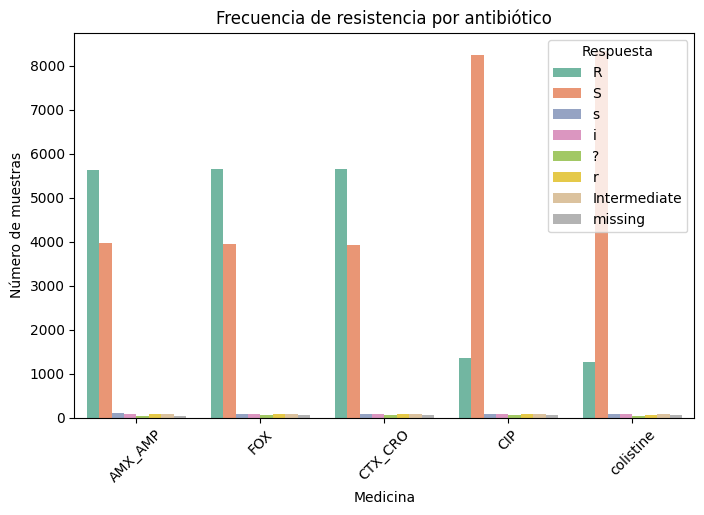

In [11]:
resistencia = df[antibioticos].melt(var_name="Antibiotico", value_name="Respuesta")
plt.figure(figsize=(8,5))
sns.countplot(data=resistencia, x="Antibiotico", hue="Respuesta", palette="Set2")
plt.title("Frecuencia de resistencia por antibiótico")
plt.xticks(rotation=45)
plt.legend(title="Respuesta", loc="upper right")
plt.xlabel("Medicina")
plt.ylabel("Número de muestras")
plt.show()


## 📈 7. Visualización cruzada – Diabetes vs. resistencia
Analizamos si los pacientes con diabetes presentan más resistencia (R) que los no diabéticos.


/tmp/ipython-input-2581714860.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Diabetes", y="Resistencias_totales", palette="coolwarm")


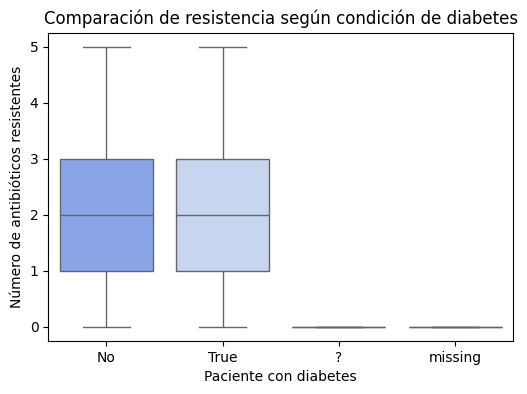

In [12]:
# Simplificamos las respuestas: contamos cuántos antibióticos 'R' tiene cada paciente
def contar_resistencias(row):
    return (row[antibioticos] == 'R').sum()

df["Resistencias_totales"] = df.apply(contar_resistencias, axis=1)

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Diabetes", y="Resistencias_totales", palette="coolwarm")
plt.title("Comparación de resistencia según condición de diabetes")
plt.xlabel("Paciente con diabetes")
plt.ylabel("Número de antibióticos resistentes")
plt.show()


## 🧠 8. Heatmap de correlación entre variables clínicas y resistencia

Convertimos las columnas de antibióticos en valores binarios (R=1, S=0) para analizar patrones de resistencia.


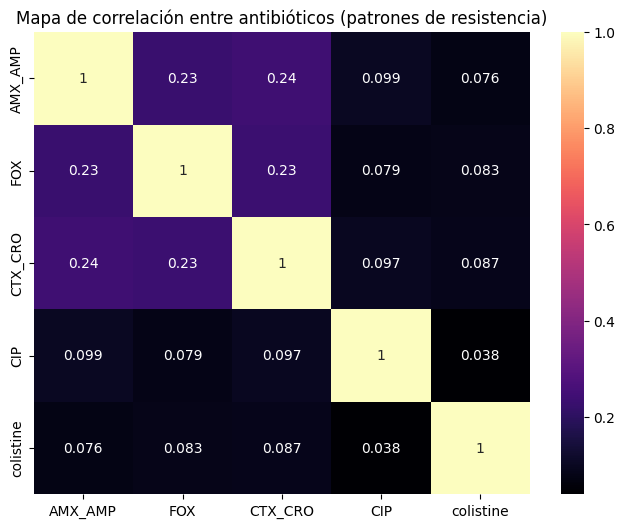

In [13]:
df_bin = df.copy()
for ab in antibioticos:
    df_bin[ab] = df_bin[ab].map({'R': 1, 'S': 0, 'I': 0.5})

plt.figure(figsize=(8,6))
sns.heatmap(df_bin[antibioticos].corr(), cmap="magma", annot=True)
plt.title("Mapa de correlación entre antibióticos (patrones de resistencia)")
plt.show()


## 📊 9. Distribución de frecuencia de infecciones hospitalarias


In [14]:
# 🧹 Limpieza segura de la columna Infection_Freq
# Convertimos los valores numéricos y forzamos errores a NaN
df["Infection_Freq_clean"] = pd.to_numeric(df["Infection_Freq"], errors="coerce")

# Mostrar resumen de los valores válidos
print("🔍 Valores válidos en Infection_Freq:", df["Infection_Freq_clean"].notna().sum())
print("⚠️ Valores no numéricos (convertidos a NaN):", df["Infection_Freq_clean"].isna().sum())

🔍 Valores válidos en Infection_Freq: 9714
⚠️ Valores no numéricos (convertidos a NaN): 996


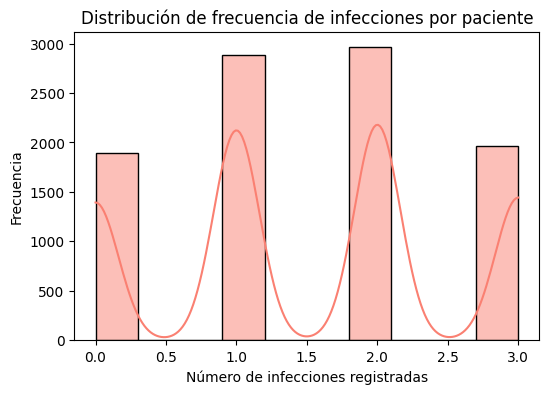

In [15]:
# 📊 Visualización corregida
plt.figure(figsize=(6,4))
sns.histplot(df["Infection_Freq_clean"], bins=10, color="salmon", kde=True)
plt.title("Distribución de frecuencia de infecciones por paciente")
plt.xlabel("Número de infecciones registradas")
plt.ylabel("Frecuencia")
plt.show()



## 🧪 10. Pairplot de relaciones entre antibióticos
Visualización multivariable para observar grupos de resistencia similares.


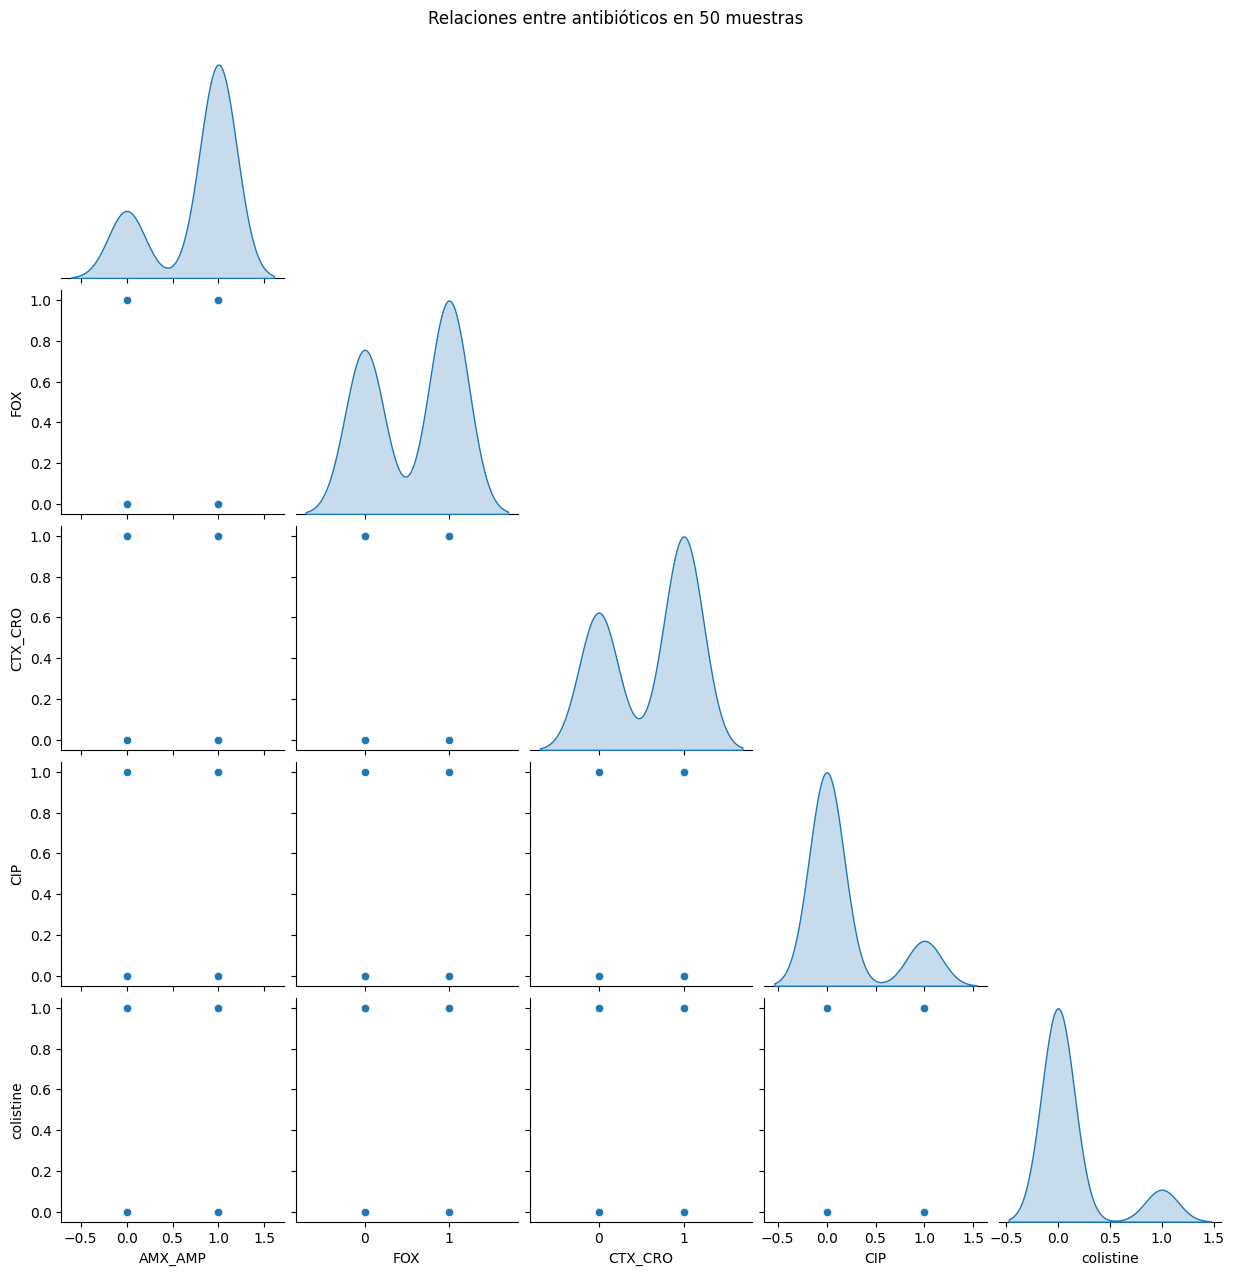

In [16]:
sns.pairplot(df_bin[antibioticos].sample(50), diag_kind="kde", corner=True)
plt.suptitle("Relaciones entre antibióticos en 50 muestras", y=1.02)
plt.show()


## 💀 11. Ejemplos de *gráficas horrendas* 🧟 (malas prácticas)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


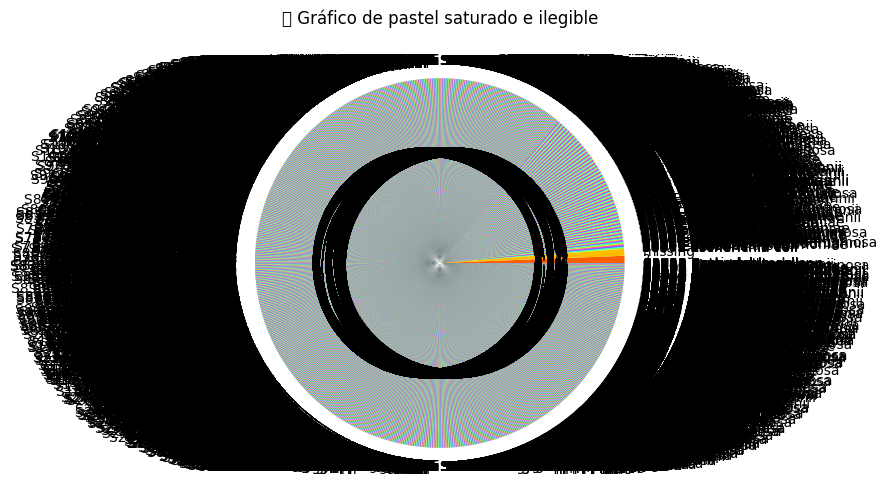

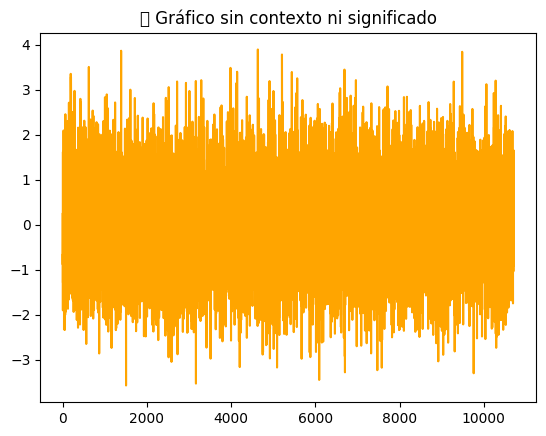

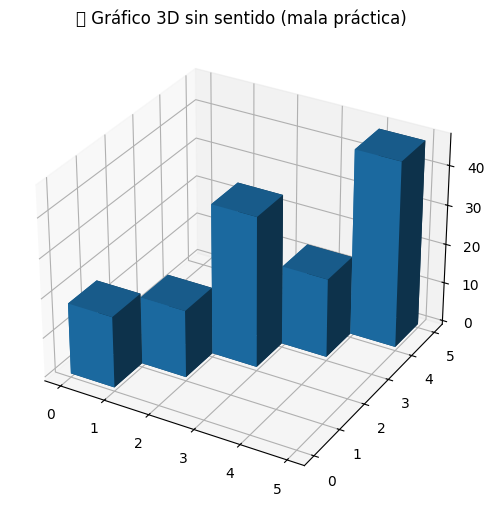

In [17]:
# Ejemplo 1: Gráfico de pastel ilegible con demasiadas categorías
plt.figure(figsize=(6,6))
df["Souches"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("hsv", 15))
plt.title("🚫 Gráfico de pastel saturado e ilegible")
plt.ylabel("")
plt.show()

# Ejemplo 2: Gráfico sin etiquetas ni contexto
plt.plot(df.index, np.random.randn(len(df)), color="orange")
plt.title("🚫 Gráfico sin contexto ni significado")
plt.show()

# Ejemplo 3: Gráfico 3D innecesario
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.bar3d(np.arange(5), np.arange(5), np.zeros(5), 1, 1, np.random.randint(10,50,5))
plt.title("🚫 Gráfico 3D sin sentido (mala práctica)")
plt.show()
